In [346]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import pandas as pd
from pandas import DataFrame, Series
from __future__ import division
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV, Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from pandas import DataFrame, Series
from __future__ import division
from sklearn.datasets import load_digits
from sklearn.metrics import r2_score
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import sklearn.datasets as slkd
import csv
sns.set(style='ticks', palette='Set2')
%matplotlib inline

In [631]:
df = pd.read_csv("train_final.csv")
Df_ToSubmitSet = pd.read_csv("test_final.csv")
dfcopy = df.copy()

# EDA

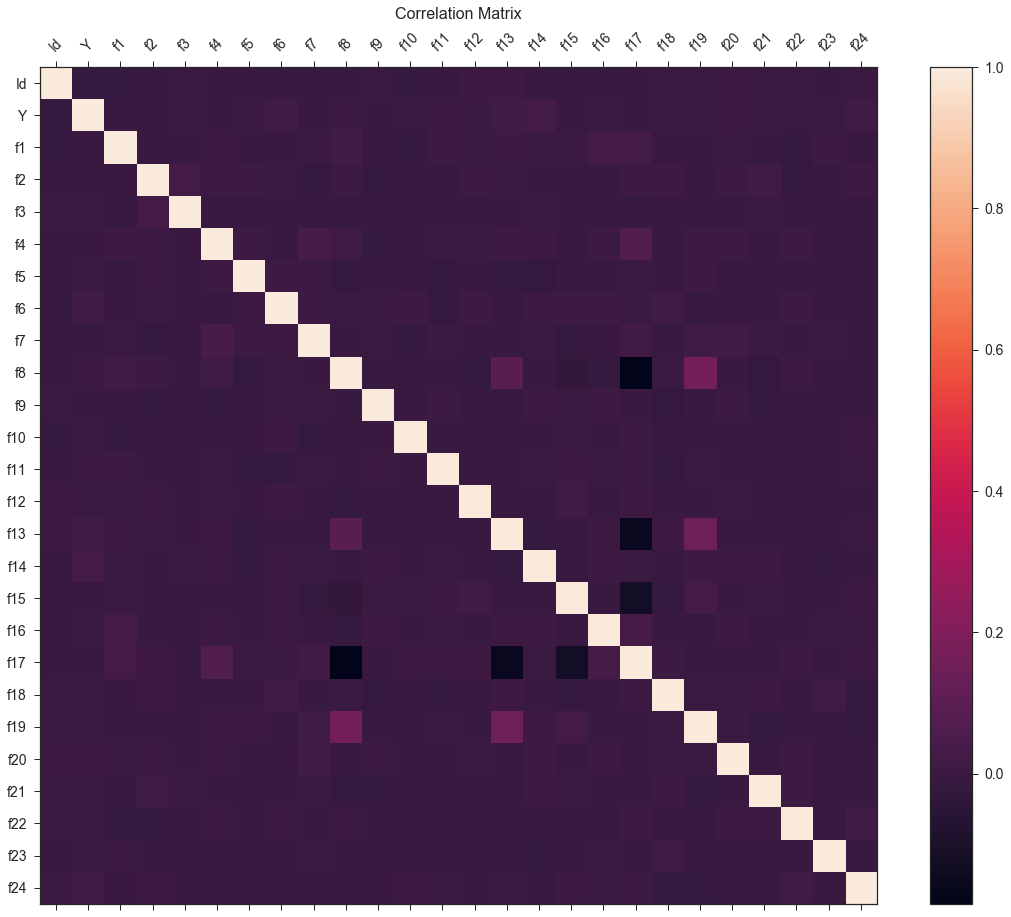

In [4]:
##Check for correlations between independent variables
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

No strong linear correlations found, no data needs to be removed

In [5]:
df.isnull().sum()

Id     0
Y      0
f1     0
f2     0
f3     0
f4     0
f5     0
f6     0
f7     0
f8     0
f9     0
f10    0
f11    0
f12    0
f13    0
f14    0
f15    0
f16    0
f17    0
f18    0
f19    0
f20    0
f21    0
f22    0
f23    0
f24    0
dtype: int64

In [6]:
len(df[df['Y'] == 1])/len(df)*100

94.21351400842336

94% of the rows in the data have the Y = 1. Going to need to account for that somehow

In [47]:
df[['f10','f11','f12','f13','f14','f15','f16','f17','f18','f19','f20','f21','f22','f23','f24']].describe()

,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24
count,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,1.638300e+04,16383.000000
mean,4.976317,1.042483,6.378380,119774.307941,0.293940,25894.316914,119045.099005,184622.040835,1.047305,125959.667765,1.044558,1.045718,1.041934,3.271890e+04,1.043948
std,65.629620,0.254664,108.216528,5609.093416,1.728999,36086.993946,18321.987129,100590.811845,0.306239,31091.344158,0.262576,0.266874,0.246597,3.184929e+06,0.259640
min,0.000000,1.000000,1.000000,117880.000000,-7.446045,25.000000,4674.000000,3130.000000,1.000000,117879.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000
25%,0.000000,1.000000,1.000000,118232.000000,-0.704562,4554.000000,118395.000000,118398.000000,1.000000,118274.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000
50%,0.000000,1.000000,1.000000,118565.000000,1.000000,13234.000000,118929.000000,119095.000000,1.000000,118568.000000,1.000000,1.000000,1.000000,2.000000e+00,1.000000
75%,1.000000,1.000000,2.000000,119348.000000,1.000000,38902.000000,120539.000000,290919.000000,1.000000,120006.000000,1.000000,1.000000,1.000000,9.000000e+00,1.000000
max,5036.000000,8.000000,10076.000000,270691.000000,7.398682,311696.000000,286792.000000,308574.000000,18.000000,311867.000000,8.000000,8.000000,7.000000,4.042886e+08,8.000000


In [48]:
df[['Y','f1','f2','f3','f4','f5','f6','f7','f8','f9']].describe()

,Y,f1,f2,f3,f4,f5,f6,f7,f8,f9
count,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000
mean,0.942135,43007.775865,1.044375,11.770938,118323.581456,1.044436,0.050052,117089.674113,169730.178600,1.041812
std,0.233495,33611.182771,0.264806,353.187115,4518.059755,0.265601,0.293892,10261.292970,69396.677853,0.258226
min,0.000000,-1.000000,1.000000,1.770000,23779.000000,1.000000,0.000000,4292.000000,4673.000000,1.000000
25%,1.000000,20311.000000,1.000000,1.770000,118096.000000,1.000000,0.000000,117961.000000,117906.000000,1.000000
50%,1.000000,35527.000000,1.000000,1.770000,118300.000000,1.000000,0.000000,117961.000000,128130.000000,1.000000
75%,1.000000,74240.500000,1.000000,3.540000,118386.000000,1.000000,0.000000,117961.000000,234498.500000,1.000000
max,1.000000,312152.000000,7.000000,43910.160000,286791.000000,9.000000,10.000000,311178.000000,311867.000000,11.000000


Despite initially finding no correlations between columns, it seems as though some columns are extremely similar. For example, columns f2 and f5 have means within .0001 of eachother. 

In [7]:
DfY = df[df['Y'] == 0]

In [11]:
DfY[['f10','f11','f12','f13','f14','f15','f16','f17','f18','f19','f20','f21','f22','f23','f24']].describe()

,Y,f1,f2,f3,f4,f5,f6,f7,f8,f9
count,948.0,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000
mean,0.0,43068.039030,1.045359,8.231994,118324.258439,1.041139,0.031646,117342.818565,168077.553797,1.042194
std,0.0,33246.425071,0.288918,45.456822,8011.886991,0.342972,0.186816,7950.604392,70916.528792,0.248145
min,0.0,-1.000000,1.000000,1.770000,31010.000000,1.000000,0.000000,5110.000000,4673.000000,1.000000
25%,0.0,20896.000000,1.000000,1.770000,118052.000000,1.000000,0.000000,117961.000000,117906.000000,1.000000
50%,0.0,35789.000000,1.000000,1.770000,118300.000000,1.000000,0.000000,117961.000000,121926.000000,1.000000
75%,0.0,72020.000000,1.000000,3.540000,118386.000000,1.000000,0.000000,118120.000000,240982.250000,1.000000
max,0.0,302048.000000,7.000000,1283.250000,286791.000000,9.000000,2.000000,130570.000000,311622.000000,4.000000


In [9]:
DfY[['Y','f1','f2','f3','f4','f5','f6','f7','f8','f9']].describe()

,Y,f1,f2,f3,f4,f5,f6,f7,f8,f9
count,948.0,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000
mean,0.0,43068.039030,1.045359,8.231994,118324.258439,1.041139,0.031646,117342.818565,168077.553797,1.042194
std,0.0,33246.425071,0.288918,45.456822,8011.886991,0.342972,0.186816,7950.604392,70916.528792,0.248145
min,0.0,-1.000000,1.000000,1.770000,31010.000000,1.000000,0.000000,5110.000000,4673.000000,1.000000
25%,0.0,20896.000000,1.000000,1.770000,118052.000000,1.000000,0.000000,117961.000000,117906.000000,1.000000
50%,0.0,35789.000000,1.000000,1.770000,118300.000000,1.000000,0.000000,117961.000000,121926.000000,1.000000
75%,0.0,72020.000000,1.000000,3.540000,118386.000000,1.000000,0.000000,118120.000000,240982.250000,1.000000
max,0.0,302048.000000,7.000000,1283.250000,286791.000000,9.000000,2.000000,130570.000000,311622.000000,4.000000


Check to see if there are any obvious differences in the feature if we limit to only the minority class of Y=0

In [632]:
##Create the dataframe which the engineered features will go into
DfFE = pd.DataFrame()
DfFE['Y'] = df['Y']
Test_X = pd.DataFrame()

# Feature Engineering/Analysis

### F1

115218.52000000003

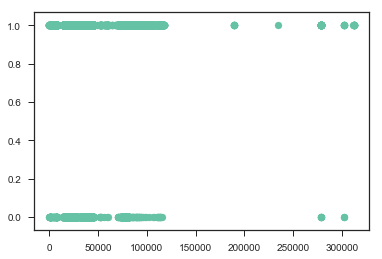

In [633]:
plt.scatter(df['f1'], df['Y'])
np.percentile(df['f1'],99)

In [634]:
# f1log = np.log(df['f1']+1)
# f1log.describe()
# DfFE['f1'] = f1log

# plt.scatter('Y', 'f1', data = DfFE)

# Test_X['f1'] = np.log(Df_ToSubmitSet['f1']+1)


# F2

0.0578648599158
0.0578224837097
0.0605427974948
0.0666666666667
0.0


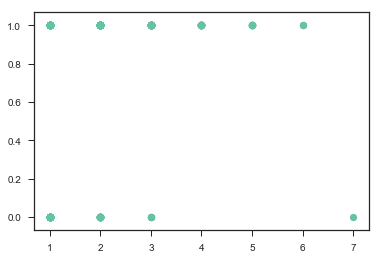

In [635]:
plt.scatter('f2', 'Y', data = df)


print len(df[df['Y'] == 0])/len(df)
print len(df[(df['f2'] == 1) & (df['Y'] == 0)])/len(df[(df['f2'] == 1)])
print len(df[(df['f2'] == 2) & (df['Y'] == 0)])/len(df[(df['f2'] == 2)])
print len(df[(df['f2'] == 3) & (df['Y'] == 0)])/len(df[(df['f2'] == 3)])
print len(df[(df['f2'] == 4) & (df['Y'] == 0)])/len(df[(df['f2'] == 4)])

dff2_processed = pd.get_dummies(df['f2'], prefix_sep="f2_", columns = 'f2')
DfFE['F2_1'] = dff2_processed[1]
DfFE['F2_2'] = dff2_processed[2]
DfFE['F2_3'] = dff2_processed[3]
DfFE['F2_4'] = dff2_processed[4]
DfFE['F2_5'] = dff2_processed[5]
DfFE['F2_6'] = dff2_processed[6]
DfFE['F2_7'] = dff2_processed[7]

df['f2'].value_counts()

dff2Test_processed = pd.get_dummies(Df_ToSubmitSet['f2'], prefix_sep="f2_", columns = 'f2')
Test_X['F2_1'] = dff2Test_processed[1]
Test_X['F2_2'] = dff2Test_processed[2]
Test_X['F2_3'] = dff2Test_processed[3]
Test_X['F2_4'] = dff2Test_processed[4]
Test_X['F2_5'] = dff2Test_processed[5]
Test_X['F2_6'] = dff2Test_processed[6]
Test_X['F2_7'] = dff2Test_processed[7]

F2 is not a continuous variable, so I made it into dummy variables

## F3

0.0578648599158
0.0572226099093
0.025
0.0


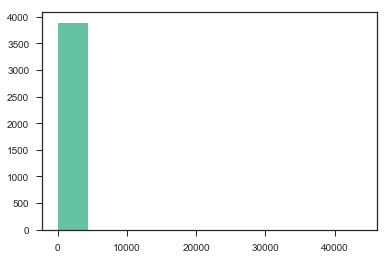

In [636]:
plt.hist(df[df['f3'] > 5]['f3'])
logf3 = np.log(df['f3'])
logf3test = np.log(Df_ToSubmitSet['f3'])
print len(df[df['Y'] == 0])/len(df)
print len(df[(df['f3'] < 2) & (df['Y'] == 0)])/len(df[(df['f3'] <2)])
print len(df[(df['f3'] > 200) & (df['Y'] == 0)])/len(df[(df['f3'] >200)])
print len(df[(df['f3'] >2000) & (df['Y'] == 0)])/len(df[(df['f3'] >2000)])

DfFE['f3'] = logf3

Test_X['f3'] = logf3test

## F4

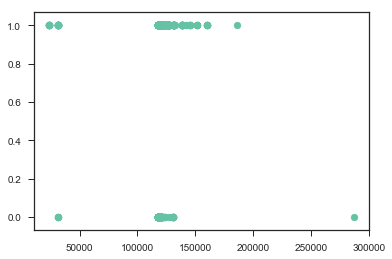

In [637]:
df['f4'].describe()
plt.scatter('f4','Y', data = df)

DfFE['f4'] = df['f4']
Test_X['f4'] = Df_ToSubmitSet['f4']

## F5

In [638]:
df['f5'].describe()

print len(df[df['Y'] == 0])/len(df)
print len(df[(df['f5'] == 1) & (df['Y'] == 0)])/len(df[(df['f5'] == 1)])
print len(df[(df['f5'] == 2) & (df['Y'] == 0)])/len(df[(df['f5'] == 2)])
print len(df[(df['f5'] == 3) & (df['Y'] == 0)])/len(df[(df['f5'] == 3)])
print len(df[(df['f5'] == 4) & (df['Y'] == 0)])/len(df[(df['f5'] == 4)])
print len(df[(df['f5'] == 5) & (df['Y'] == 0)])/len(df[(df['f5'] == 5)])
print len(df[(df['f5'] == 6) & (df['Y'] == 0)])/len(df[(df['f5'] == 6)])
print len(df[(df['f5'] == 7) & (df['Y'] == 0)])/len(df[(df['f5'] == 7)])
print len(df[(df['f5'] == 8) & (df['Y'] == 0)])/len(df[(df['f5'] == 9)])
df['f5'].value_counts()

newf5 = []

for point in df['f5']:
    if point in [2,4,6,7,9]:
        newf5.append(0)
    elif point in [1,3,5]:
        newf5.append(1)
        
DfFE['f5'] = newf5

newf5test = []

for point in Df_ToSubmitSet['f5']:
    if point in [2,4,6,7,8,9]:
        newf5test.append(0)
    else:
        newf5test.append(1)
        
Test_X['f5'] = newf5test

0.0578648599158
0.0583729028173
0.0420841683367
0.05
0.0
0.111111111111
0.0
0.0
0.0


## F6

In [639]:
df['f6'].describe()


print len(df[df['Y'] == 0])/len(df)
print len(df[(df['f6'] == 0) & (df['Y'] == 0)])/len(df[(df['f6'] == 0)])
print len(df[(df['f6'] == 1) & (df['Y'] == 0)])/len(df[(df['f6'] == 1)])
print len(df[(df['f6'] == 2) & (df['Y'] == 0)])/len(df[(df['f6'] == 2)])
print len(df[(df['f6'] > 2) & (df['Y'] == 0)])/len(df[(df['f6'] > 2)])
df['f6'].value_counts()

newf6 = []

for point in df['f6']:
    if point >= 1:
        newf6.append(0)
    elif point < 1:
        newf6.append(1)
        
DfFE['f6'] = newf6

newf6test = []

for point in Df_ToSubmitSet['f6']:
    if point >= 1:
        newf6test.append(0)
    elif point < 1:
        newf6test.append(1)
        
Test_X['f6'] = newf6test

0.0578648599158
0.0584312480152
0.0498084291188
0.025
0.0


## F7

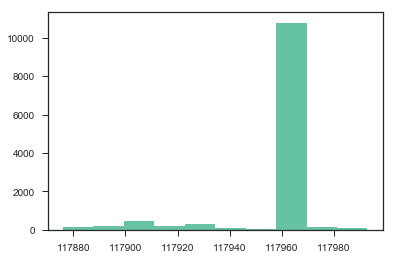

In [640]:
df['f7'].describe()
dff7 = df[(df['f7'] > 115000)&(df['f7'] < 118000)]['f7']
plt.hist(dff7)

DfFE['f7'] = df['f7']
Test_X['f7'] = Df_ToSubmitSet['f7']

## F8

0.0578648599158
0.0588108108108
0.0574927708794


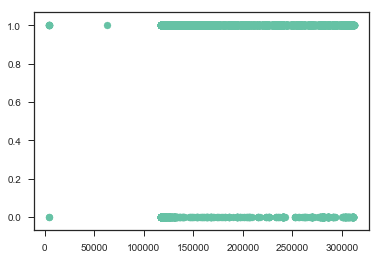

In [641]:
df['f8'].describe()
#plt.hist(df['f8'])

print len(df[df['Y'] == 0])/len(df)
print len(df[(df['f8'] > 200000) & (df['Y'] == 0)])/len(df[(df['f8'] > 200000)])
print len(df[(df['f8'] <= 200000) & (df['Y'] == 0)])/len(df[(df['f8'] <= 200000)])

plt.scatter('f8', 'Y', data = df)

DfFE['f8'] = df['f8']
Test_X['f8'] = Df_ToSubmitSet['f8']

## F9

In [642]:
df['f9'].describe()

print len(df[df['Y'] == 0])/len(df)
print len(df[(df['f9'] == 1) & (df['Y'] == 0)])/len(df[(df['f9'] == 1)])
print len(df[(df['f9'] == 2) & (df['Y'] == 0)])/len(df[(df['f9'] == 2)])
print len(df[(df['f9'] == 3) & (df['Y'] == 0)])/len(df[(df['f9'] == 3)])
print len(df[(df['f9'] > 2) & (df['Y'] == 0)])/len(df[(df['f9'] > 2)])


dff9_processed = pd.get_dummies(df['f9'], prefix_sep="f9_", columns = 'f9')
DfFE['F9_1'] = dff9_processed[1]
DfFE['F9_2'] = dff9_processed[2]
DfFE['F9_3'] = dff9_processed[3]
DfFE['F9_4'] = dff9_processed[4]
for item in df['f9']:
    if(item > 4):
        DfFE['F9GT4'] = 1
    else:
        DfFE['F9GT4'] = 0

dff9Test_processed = pd.get_dummies(Df_ToSubmitSet['f9'], prefix_sep="f9_", columns = 'f9')
Test_X['F9_1'] = dff9Test_processed[1]
Test_X['F9_2'] = dff9Test_processed[2]
Test_X['F9_3'] = dff9Test_processed[3]
Test_X['F9_4'] = dff9Test_processed[4]
for item in Df_ToSubmitSet['f9']:
    if(item > 4):
        Test_X['F9GT4'] = 1
    else:
        Test_X['F9GT4'] = 0

df['f9'].value_counts()

0.0578648599158
0.0578950691332
0.0521541950113
0.0875
0.0776699029126


1     15839
2       441
3        80
4        16
5         5
7         1
11        1
Name: f9, dtype: int64

## F10

0.0578648599158
0.0578827113481
0.0555555555556
0.0
0.0


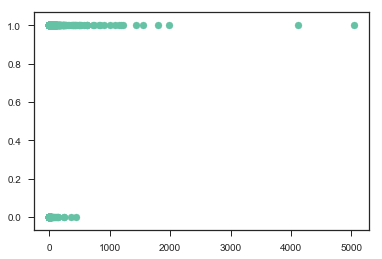

In [643]:
df['f10'].describe()
df['f10'].value_counts()

print len(df[df['Y'] == 0])/len(df)
print len(df[(df['f10'] >= 2) & (df['Y'] == 0)])/len(df[(df['f10'] >=2)])
print len(df[(df['f10'] >= 20) & (df['Y'] == 0)])/len(df[(df['f10'] >= 20)])
print len(df[(df['f10'] >= 650) & (df['Y'] == 0)])/len(df[(df['f10'] >= 650)])
print len(df[(df['f10'] >= 2000) & (df['Y'] == 0)])/len(df[(df['f10'] >= 2000)])

for item in df['f10']:
    if(item > 650):
        DfFE['f10'] = 1
    else:
        DfFE['f10'] = 0
        

for item in Df_ToSubmitSet['f10']:
    if(item > 650):
        Test_X['f10'] = 1
    else:
        Test_X['f10'] = 0
        
plt.scatter('f10', 'Y', data = df)

## F11

In [644]:
df['f11'].describe()
print len(df[df['Y'] == 0])/len(df)
print len(df[(df['f11'] == 1) & (df['Y'] == 0)])/len(df[(df['f11'] == 1)])
print len(df[(df['f11'] == 2) & (df['Y'] == 0)])/len(df[(df['f11'] == 2)])
print len(df[(df['f11'] == 3) & (df['Y'] == 0)])/len(df[(df['f11'] == 3)])
print len(df[(df['f11'] > 3) & (df['Y'] == 0)])/len(df[(df['f11'] > 3)])

df['f11'].value_counts()

dff9_processed = pd.get_dummies(df['f11'], prefix_sep="f11_", columns = 'f11')
DfFE['f11_1'] = dff9_processed[1]
DfFE['f11_2'] = dff9_processed[2]
DfFE['f11_3'] = dff9_processed[3]
for item in df['f11']:
    if(item > 3):
        DfFE['f11GT3'] = 1
    else:
        DfFE['f11GT3'] = 0
        
dff9Test_processed = pd.get_dummies(Df_ToSubmitSet['f11'], prefix_sep="f11_", columns = 'f11')
Test_X['f11_1'] = dff9Test_processed[1]
Test_X['f11_2'] = dff9Test_processed[2]
Test_X['f11_3'] = dff9Test_processed[3]
for item in Df_ToSubmitSet['f11']:
    if(item > 3):
        Test_X['f11GT3'] = 1
    else:
        Test_X['f11GT3'] = 0

0.0578648599158
0.0580424886191
0.0579710144928
0.037037037037
0.0


## F12

0.0578648599158
0.0594168636722
0.047817047817
0.0
0.0


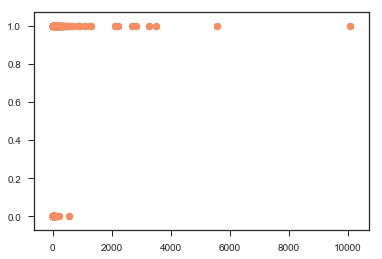

In [645]:
df['f12'].describe()
df['f12'].value_counts()

print len(df[df['Y'] == 0])/len(df)
print len(df[(df['f12'] >= 2) & (df['Y'] == 0)])/len(df[(df['f12'] >=2)])
print len(df[(df['f12'] >= 20) & (df['Y'] == 0)])/len(df[(df['f12'] >= 20)])
print len(df[(df['f12'] >= 650) & (df['Y'] == 0)])/len(df[(df['f12'] >= 650)])
print len(df[(df['f12'] >= 2000) & (df['Y'] == 0)])/len(df[(df['f12'] >= 2000)])

plt.scatter('f12', 'Y', data = df)

for item in df['f12']:
    if(item > 750):
        DfFE['f12'] = 1
    else:
        DfFE['f12'] = 0
        

for item in Df_ToSubmitSet['f12']:
    if(item > 750):
        Test_X['f12'] = 1
    else:
        Test_X['f12'] = 0
        
plt.scatter('f12', 'Y', data = df)

## F13

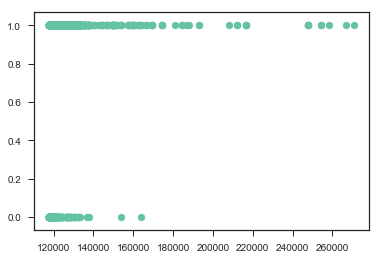

In [646]:
df['f13'].describe()
plt.scatter('f13', 'Y', data = df)

for item in df['f13']:
    if(item > 180000):
        DfFE['f13'] = 1
    else:
        DfFE['f13'] = 0
        

for item in Df_ToSubmitSet['f13']:
    if(item > 180000):
        Test_X['f13'] = 1
    else:
        Test_X['f13'] = 0

## F14

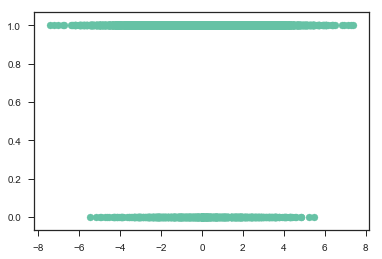

In [647]:
df['f14'].describe()

plt.scatter('f14', 'Y', data = df)

for item in df['f14']:
    if((item > 6)or(item < 6)):
        DfFE['f14GL6'] = 1
    else:
        DfFE['f14GL6'] = 0
        

for item in Df_ToSubmitSet['f14']:
    if((item > 6)or(item < 6)):
        Test_X['f14GL6'] = 1
    else:
        Test_X['f14GL6'] = 0
        
DfFE['f14'] = df['f14']
Test_X['f14'] = Df_ToSubmitSet['f14']

## F15

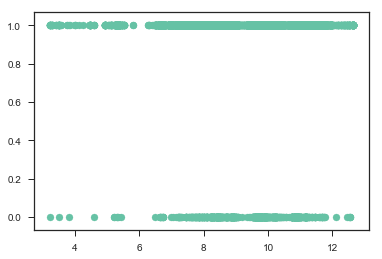

In [648]:
df['f15'].describe()

log15 = np.log(df['f15'])
ylog = df['Y']

dflogs = pd.DataFrame()
dflogs['f15'] = log15
dflogs['Y'] = ylog

plt.scatter('f15', 'Y', data = dflogs)

DfFE['f15'] = log15

log15 = np.log(Df_ToSubmitSet['f15'])

dflogstest = pd.DataFrame()
dflogstest['f15'] = log15

Test_X['f15'] = log15



## F16

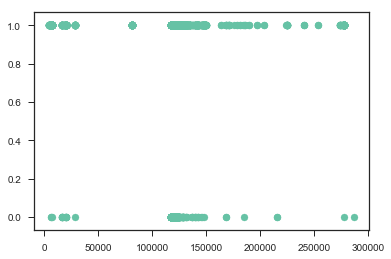

In [649]:
df['f16'].describe()
plt.scatter('f16', 'Y', data = df)

DfFE['f16'] = df['f16']
Test_X['f16'] = Df_ToSubmitSet['f16']

## F17

0.0578648599158
0.0604207876281
0.0515939597315
0.0933125972006


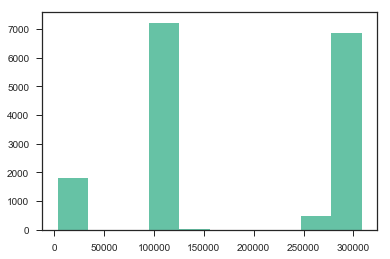

In [650]:
df['f17'].describe()
plt.hist(df['f17'])
df['f17'].value_counts()

print len(df[df['Y'] == 0])/len(df)
print len(df[(df['f17'] == 290919) & (df['Y'] == 0)])/len(df[(df['f17'] == 290919)])
print len(df[(df['f17'] < 290919) & (df['Y'] == 0)])/len(df[(df['f17'] < 290919)])
print len(df[(df['f17'] > 290919) & (df['Y'] == 0)])/len(df[(df['f17'] > 290919)])


for obj in df['f17']:
    if obj == 290919:
        DfFE['F17EQ'] = 1
        DfFE['F17G'] = 0
        DfFE['F17L'] = 0
    elif obj > 290919:
        DfFE['F17EQ'] = 0
        DfFE['F17G'] = 1
        DfFE['F17L'] = 0
        
    elif obj < 290919:
        DfFE['F17EQ'] = 0
        DfFE['F17G'] = 0
        DfFE['F17L'] = 1

for obj in Df_ToSubmitSet['f17']:
    if obj == 290919:
        Test_X['F17EQ'] = 1
        Test_X['F17G'] = 0
        Test_X['F17L'] = 0
    elif obj > 290919:
        Test_X['F17EQ'] = 0
        Test_X['F17G'] = 1
        Test_X['F17L'] = 0
        
    elif obj < 290919:
        Test_X['F17EQ'] = 0
        Test_X['F17G'] = 0
        Test_X['F17L'] = 1
        



## F18

0.0578648599158
0.0578653821777
0.0554455445545
0.0882352941176
0.05
0.07


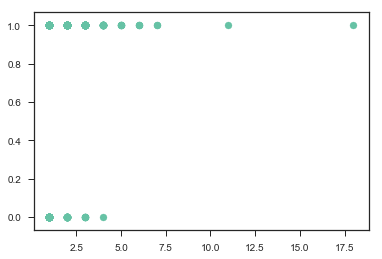

In [651]:
df['f18'].describe()

plt.scatter('f18', 'Y', data = df)


print len(df[df['Y'] == 0])/len(df)
print len(df[(df['f18'] == 1) & (df['Y'] == 0)])/len(df[(df['f18'] == 1)])
print len(df[(df['f18'] == 2) & (df['Y'] == 0)])/len(df[(df['f18'] == 2)])
print len(df[(df['f18'] == 3) & (df['Y'] == 0)])/len(df[(df['f18'] == 3)])
print len(df[(df['f18'] == 4) & (df['Y'] == 0)])/len(df[(df['f18'] == 4)])
print len(df[(df['f18'] >= 3) & (df['Y'] == 0)])/len(df[(df['f18'] >= 3)])
df['f18'].value_counts()



for obj in df['f18']:
    if obj == 3:
        DfFE['F18EQ'] = 1
        DfFE['F18G'] = 0
        DfFE['F18L'] = 0
    elif obj > 3:
        DfFE['F18EQ'] = 0
        DfFE['F18G'] = 1
        DfFE['F18L'] = 0
        
    elif obj < 3:
        DfFE['F18EQ'] = 0
        DfFE['F18G'] = 0
        DfFE['F18L'] = 1

for obj in Df_ToSubmitSet['f18']:
    if obj == 3:
        Test_X['F18EQ'] = 1
        Test_X['F18G'] = 0
        Test_X['F18L'] = 0
    elif obj > 3:
        Test_X['F18EQ'] = 0
        Test_X['F18G'] = 1
        Test_X['F18L'] = 0
        
    elif obj < 3:
        Test_X['F18EQ'] = 0
        Test_X['F18G'] = 0
        Test_X['F18L'] = 1

## F19

0.0578648599158
0.081641285956
0.0538554818461
0.0308988764045
0.0581141757537
0.070938215103


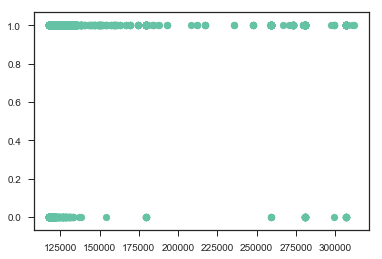

In [652]:
df['f19'].describe()
df['f19'].value_counts()
plt.scatter('f19', 'Y', data = df)

print len(df[df['Y'] == 0])/len(df)

print len(df[(df['f19'] == 118321) & (df['Y'] == 0)])/len(df[(df['f19'] == 118321)])

print len(df[(df['f19'] != 118321) & (df['Y'] == 0)])/len(df[(df['f19'] != 118321)])

print len(df[(df['f19'] > 150000) & (df['f19'] < 275000) & (df['Y'] == 0)])/len(df[(df['f19'] > 150000)& (df['f19'] < 275000)])

print len(df[(df['f19'] <= 150000) & (df['Y'] == 0)])/len(df[(df['f19'] <= 150000)])

print len(df[(df['f19'] > 275000) & (df['Y'] == 0)])/len(df[(df['f19'] > 275000)])


DfFE['f19'] = df['f19']

for item in df['f19']:
    if item == 118321:
        DfFE['f19eq'] = 1
    else:
        DfFE['f19eq'] = 0

Test_X['f19'] = Df_ToSubmitSet['f19']

for item in Df_ToSubmitSet['f19']:
    if item == 118321:
        Test_X['f19eq'] = 1
    else:
        Test_X['f19eq'] = 0



## F20

0.0578648599158
0.0582241630277
0.0524109014675
0.0384615384615
0.0
0.0285714285714


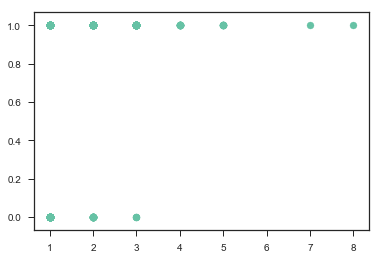

In [653]:
df['f20'].describe()
df['f20'].value_counts()
plt.scatter('f20','Y', data = df)

print len(df[df['Y'] == 0])/len(df)
print len(df[(df['f20'] == 1) & (df['Y'] == 0)])/len(df[(df['f20'] == 1)])
print len(df[(df['f20'] == 2) & (df['Y'] == 0)])/len(df[(df['f20'] == 2)])
print len(df[(df['f20'] == 3) & (df['Y'] == 0)])/len(df[(df['f20'] == 3)])
print len(df[(df['f20'] == 4) & (df['Y'] == 0)])/len(df[(df['f20'] == 4)])
print len(df[(df['f20'] >= 3) & (df['Y'] == 0)])/len(df[(df['f20'] >= 3)])

dff20_processed = pd.get_dummies(df['f20'], prefix_sep="f20", columns = 'f20')
DfFE['f20_1'] = dff20_processed[1]
DfFE['f20_2'] = dff20_processed[2]
DfFE['f20_3'] = dff20_processed[3]
for item in df['f20']:
    if(item > 3):
        DfFE['f20GT3'] = 1
    else:
        DfFE['f20GT3'] = 0
        
dff20Test_processed = pd.get_dummies(Df_ToSubmitSet['f20'], prefix_sep="f20_", columns = 'f20')
Test_X['f20_1'] = dff9Test_processed[1]
Test_X['f20_2'] = dff9Test_processed[2]
Test_X['f20_3'] = dff9Test_processed[3]
for item in Df_ToSubmitSet['f20']:
    if(item > 3):
        Test_X['f20GT3'] = 1
    else:
        Test_X['f20GT3'] = 0

## F21

0.0578648599158
0.0580031695721
0.0523255813953
0.0923076923077
0.0
0.0652173913043


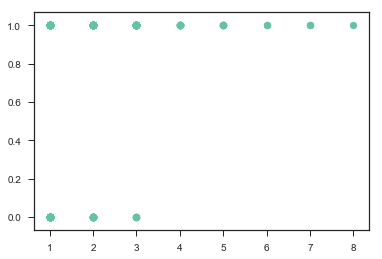

In [654]:
df['f21'].describe()
df['f21'].value_counts()
plt.scatter('f21', 'Y', data = df)

print len(df[df['Y'] == 0])/len(df)
print len(df[(df['f21'] == 1) & (df['Y'] == 0)])/len(df[(df['f21'] == 1)])
print len(df[(df['f21'] == 2) & (df['Y'] == 0)])/len(df[(df['f21'] == 2)])
print len(df[(df['f21'] == 3) & (df['Y'] == 0)])/len(df[(df['f21'] == 3)])
print len(df[(df['f21'] == 4) & (df['Y'] == 0)])/len(df[(df['f21'] == 4)])
print len(df[(df['f21'] >= 3) & (df['Y'] == 0)])/len(df[(df['f21'] >= 3)])

dff21_processed = pd.get_dummies(df['f21'], prefix_sep="f21", columns = 'f21')
DfFE['f21_1'] = dff21_processed[1]
DfFE['f21_2'] = dff21_processed[2]
DfFE['f21_3'] = dff21_processed[3]
for item in df['f21']:
    if(item > 3):
        DfFE['f21GT3'] = 1
    else:
        DfFE['f21GT3'] = 0
        
dff21Test_processed = pd.get_dummies(Df_ToSubmitSet['f21'], prefix_sep="f21_", columns = 'f21')
Test_X['f21_1'] = dff21Test_processed[1]
Test_X['f21_2'] = dff21Test_processed[2]
Test_X['f21_3'] = dff21Test_processed[3]
for item in Df_ToSubmitSet['f21']:
    if(item > 3):
        Test_X['f21GT3'] = 1
    else:
        Test_X['f21GT3'] = 0

## F22

0.0578648599158
0.0579160343955
0.0579710144928
0.0350877192982
0.0952380952381
0.047619047619


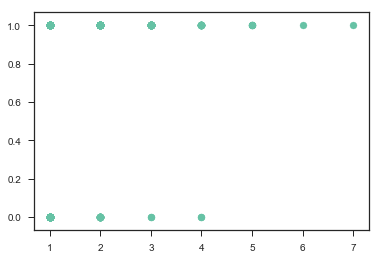

In [655]:
df['f22'].describe()

plt.scatter('f22', 'Y', data = df)

print len(df[df['Y'] == 0])/len(df)
print len(df[(df['f22'] == 1) & (df['Y'] == 0)])/len(df[(df['f22'] == 1)])
print len(df[(df['f22'] == 2) & (df['Y'] == 0)])/len(df[(df['f22'] == 2)])
print len(df[(df['f22'] == 3) & (df['Y'] == 0)])/len(df[(df['f22'] == 3)])
print len(df[(df['f22'] == 4) & (df['Y'] == 0)])/len(df[(df['f22'] == 4)])
print len(df[(df['f22'] >= 3) & (df['Y'] == 0)])/len(df[(df['f22'] >= 3)])

df['f22'].value_counts()

DfFE['f22'] = df['f22']
Test_X['f22'] = Df_ToSubmitSet['f22']

## F23

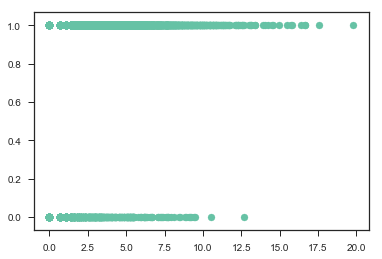

In [656]:
df['f23'].describe()
df['f23'].value_counts()

log23 = np.log(df['f23'])
ylog = df['Y']

dflogs = pd.DataFrame()
dflogs['f23'] = log23
dflogs['Y'] = ylog

plt.scatter('f23', 'Y', data = dflogs)

DfFE['f23'] = log23

log23 = np.log(Df_ToSubmitSet['f23'])

dflogstest = pd.DataFrame()
dflogstest['f23'] = log23

Test_X['f23'] = log23

## F24

0.0578648599158
0.0579160343955
0.0579710144928
0.0350877192982
0.0952380952381
0.047619047619


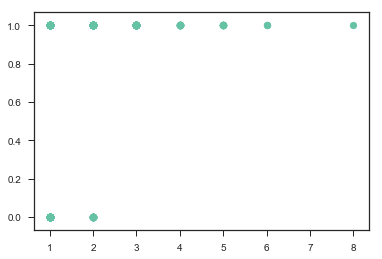

In [657]:
df['f24'].describe()

plt.scatter('f24', 'Y', data = df)

print len(df[df['Y'] == 0])/len(df)
print len(df[(df['f22'] == 1) & (df['Y'] == 0)])/len(df[(df['f22'] == 1)])
print len(df[(df['f22'] == 2) & (df['Y'] == 0)])/len(df[(df['f22'] == 2)])
print len(df[(df['f22'] == 3) & (df['Y'] == 0)])/len(df[(df['f22'] == 3)])
print len(df[(df['f22'] == 4) & (df['Y'] == 0)])/len(df[(df['f22'] == 4)])
print len(df[(df['f22'] >= 3) & (df['Y'] == 0)])/len(df[(df['f22'] >= 3)])

df['f24'].value_counts()


dff24_processed = pd.get_dummies(df['f24'], prefix_sep="f24", columns = 'f24')
DfFE['f24_1'] = dff21_processed[1]
DfFE['f24_2'] = dff21_processed[2]
DfFE['f24_3'] = dff21_processed[3]
for item in df['f24']:
    if(item > 3):
        DfFE['f24GT3'] = 1
    else:
        DfFE['f24GT3'] = 0
        
dff21Test_processed = pd.get_dummies(Df_ToSubmitSet['f24'], prefix_sep="f24_", columns = 'f24')
Test_X['f24_1'] = dff21Test_processed[1]
Test_X['f24_2'] = dff21Test_processed[2]
Test_X['f24_3'] = dff21Test_processed[3]
for item in Df_ToSubmitSet['f24']:
    if(item > 3):
        Test_X['f24GT3'] = 1
    else:
        Test_X['f24GT3'] = 0

# Lasso and Ridge

In [658]:
from sklearn.linear_model import LogisticRegression
Df_train, Df_test = train_test_split(DfFE, test_size=0.2)
X_train = Df_train.drop(['Y'], axis = 1)
Y_train = Df_train['Y']
X_test = Df_test.drop(['Y'], axis = 1)
Y_test = Df_test['Y']

Whole_X = DfFE.drop(['Y'], axis = 1)
Whole_Y = DfFE['Y']


Test_X_RL = Test_X.copy

In [659]:
print X_train.isnull().sum().sum()
print Y_train.isnull().sum().sum()
print np.isinf(X_train).sum().sum()

0
0
0


In [660]:
#generate lost of alphas
n_alphas = 200
alphas = np.logspace(-10,-2,n_alphas)

#run ridge with cross validation and fit it to the training data
ridge_cross = RidgeCV(alphas=alphas, normalize=True, store_cv_values=True)
ridge_cross = ridge_cross.fit(X_train,Y_train)
ridge_cross_preds = ridge_cross.predict(X_test)

#print the optimal alpha and R^2
print("RIDGE REGRESSION")
print("Optimal Alpha:",ridge_cross.alpha_)
print("R^2 for Optimal Alpha:", roc_auc_score(Y_test, ridge_cross_preds))
print("##############################################")

#run lasso with cross validation and fit it to the training data
lasso_cross = LassoCV(alphas=None,normalize=True)
lasso_cross.fit(X_train,Y_train)
lasso_cross_preds = lasso_cross.predict(X_test)
      
#print the optimal alpha and R^2
print("LASSO REGRESSION")
print("Optimal Alpha:",lasso_cross.alpha_)
print("R^2 for Optimal Alpha:",roc_auc_score(Y_test,lasso_cross_preds))



RIDGE REGRESSION
('Optimal Alpha:', 0.01)
('R^2 for Optimal Alpha:', 0.5720056755956275)
##############################################
LASSO REGRESSION
('Optimal Alpha:', 3.60763281200131e-05)
('R^2 for Optimal Alpha:', 0.5622955166927257)


In [661]:
ridgepredtrain = ridge_cross.predict(Whole_X)
ridgepredtest = ridge_cross.predict(X_test)
lassopredtrain = lasso_cross.predict(Whole_X)
lassopredtest = lasso_cross.predict(X_test)
lassofinal = lasso_cross.predict(Test_X)
ridgefinal = ridge_cross.predict(Test_X)

Lasso and Ridge, by themselves at least, are innefective at predicting the response class

## Logistic Regression

In [662]:
LogistModel = LogisticRegression()
##Tried L1 too and elasticnet
parameters = {
     "penalty"    : ['l2'],
     "class_weight"        :['balanced'],
     "solver"            : ['lbfgs', 'sag', 'saga'],
     }

grid = GridSearchCV(LogistModel,
                    parameters, n_jobs=4,
                    scoring="roc_auc",
                    cv=5)

grid.fit(X_train, Y_train)




GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=4,
       param_grid={'penalty': ['l2'], 'solver': ['lbfgs', 'sag', 'saga'], 'class_weight': ['balanced']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [663]:
logisticpreditionstrain = grid.predict_proba(Whole_X)
logisticpredictionstest = grid.predict_proba(X_test)
logisticpredictionsfinal = grid.predict_proba(Test_X)

# Model Training

## Random Forest

In [665]:
DfFE
Df_train, Df_test = train_test_split(DfFE, test_size=0.2)
X_train = Df_train.drop('Y', axis = 1)
Y_train = Df_train['Y']
X_test = Df_test.drop('Y', axis = 1)
Y_test = Df_test['Y']

Whole_X = DfFE.drop('Y', axis = 1)
Whole_Y = DfFE['Y']
 
D_train = xgb.DMatrix(X_train, label=Y_train)
D_test = xgb.DMatrix(X_test, label=Y_test)

Whole_D_train = xgb.DMatrix(X_train, label=Y_train)

In [107]:
n_trees = range(20,205,5)
depthtest = range(1,60)
N_Trees_Accuracies = []
N_trees = []
Depths = []
Depth_Accuracies = []

for est in n_trees:
    RandFor = RandomForestClassifier(n_estimators = est)
    RandFor.fit(X_train, Y_train)    
    RandFor.predict(X_test)
    N_Trees_Accuracies.append(RandFor.score(X_test, Y_test))
    N_trees.append(est)
    
Best_N_Trees = N_trees[N_Trees_Accuracies.index(max(N_Trees_Accuracies))]

for depth in depthtest:
    RandFor2 = RandomForestClassifier(n_estimators = Best_N_Trees, max_depth = depth)
    RandFor2.fit(X_train, Y_train)    
    RandFor2.predict(X_test)
    Depth_Accuracies.append(RandFor2.score(X_test, Y_test))
    Depths.append(depth)
    
Best_Depth = Depths[Depth_Accuracies.index(max(Depth_Accuracies))]

In [128]:
Best_Depth = Depths[Depth_Accuracies.index(max(Depth_Accuracies))]
FinalRandFor = RandomForestClassifier(n_estimators = Best_N_Trees, max_depth = Best_Depth)

RandFor2.fit(Whole_X, Whole_Y)
predictions = RandFor2.predict_proba(Df_ToSubmitSet)



In [136]:
realpred = []
for item in predictions:
    realpred.append(item[1])
    
Dfout = pd.DataFrame()
Dfout['Id'] = Df_ToSubmitSet['Id']
Dfout['pred'] = realpred

Dfout.describe()


Dfout.to_csv(r'Take20.csv')

In [462]:
print len(ridgepredtrain)
print len(DfFE)


Test_X_Logi = []
for item in logisticpredictionsfinal:
    pred = item[1]
    Test_X_Logi.append(pred)
    
    
Train_X_Logi = []
for item in logisticpreditionstrain:
    pred = item[1]
    Train_X_Logi.append(pred)
    


16383
16383


## XGBoost

In [685]:
# D_train = xgb.DMatrix(DfFE, label=DfFE['Y'])
# D_test = xgb.DMatrix(X_test, label=Y_test)


Test_X['ridgepred'] = ridgefinal
Test_X['lassopred'] = lassofinal
Test_X['logistpred'] = Test_X_Logi


DfFE['ridgepred'] = ridgepredtrain
DfFE['lassopred'] = lassopredtrain
DfFE['logistpred'] = Train_X_Logi


Df_train, Df_test = train_test_split(DfFE, test_size=0.2)
X_train = Df_train.drop('Y', axis = 1)
Y_train = Df_train['Y']
X_test = Df_test.drop('Y', axis = 1)
Y_test = Df_test['Y']



Whole_X = DfFE.drop('Y', axis = 1)
Whole_Y = DfFE['Y']
 
D_train = xgb.DMatrix(X_train, label=Y_train)
D_test = xgb.DMatrix(X_test, label=Y_test)

Whole_D_train = xgb.DMatrix(Whole_X, label=Whole_Y)

D_train = xgb.DMatrix(X_train, label=Y_train)
D_test = xgb.DMatrix(Test_X, label = Y_test)

In [709]:
clf = xgb.XGBClassifier()
parameters = {
     "eta"    : [.001],
     "max_depth"        :[24],
     "gamma"            : [.2],
     "colsample_bytree" : [0.2],
     "tree_method"      : ['auto', 'exact', 'approx'],
     "num_parallel_tree": [1,2,3]
     }

grid = GridSearchCV(clf,
                    parameters, n_jobs=4,
                    scoring="roc_auc",
                    cv=3
                   )

grid.fit(X_train, Y_train)

print("The best parameters were", grid.best_params_)
print("These parameters achieved a score of", grid.best_score_)

XGBModel = xgb.XGBClassifier()

('The best parameters were', {'num_parallel_tree': 3, 'colsample_bytree': 0.2, 'eta': 0.001, 'tree_method': 'approx', 'max_depth': 24, 'gamma': 0.2})
('These parameters achieved a score of', 0.8710318750593316)


In [710]:
grid.score(X_test, Y_test)

0.8578933872375394

In [711]:
parameters = grid.best_params_
model = xgb.train(parameters, Whole_D_train)
predictions = model.predict(D_test)

In [716]:
predictions

array([0.5040719 , 0.5033612 , 0.5046483 , ..., 0.50457764, 0.5044566 ,
       0.50447136], dtype=float32)

In [717]:
realpred = []
for item in predictions:
    realpred.append(item)
    
Dfout = pd.DataFrame()
Dfout['Id'] = Df_ToSubmitSet['Id']
Dfout['Y'] = realpred

Dfout.describe()


Dfout.to_csv(r'Take17.csv')

In [156]:
predictions[2]

0.78370744